<a href="https://colab.research.google.com/github/edoruin/EDA_practices/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

####first data analysis practices


This is a simple practice about the Exploratory Data Analysis, Where the priority is the effectiveness of analysis rather than his complexity. The learning objetive is improve the quality of my conclusions and objectives that I extract of the data.


The topic revolves around an online store where data has been generated randomly by ChatGPT. The task is to analyze this data and provide recommendations to improve the profits to the company


###Creating and observing the data


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:

#In this case Im going to create de database


# Creating dataset
import pandas as pd

# Datos en inglés
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Sales': [10000, 12000, 14000, 13000, 15000, 16000, 17000, 18000, 19000, 20000, 22000, 24000],
    'Costs': [7000, 8000, 9000, 8500, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000],
    'Profits': [3000, 4000, 5000, 4500, 5000, 5000, 5000, 5000, 5000, 5000, 6000, 7000],
    'New Customers': [50, 60, 55, 65, 70, 80, 90, 95, 85, 100, 105, 110],
    'Lost Customers': [0, 3, 5, 8, 11, 14, 17, 21, 24, 27, 31, 35],
    'Total Customers': [50, 107, 157, 214, 273, 339, 412, 486, 547, 620, 694, 769]
}

# Crear el DataFrame
df= pd.DataFrame(data)




# Save the dataset
df.to_csv('/content/drive/MyDrive/Programing notes/Data Analysis practices/SalesAnalysis.csv', index=False)

In [51]:
#alls the columns less the month col are numeric columns, doesn't null values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            12 non-null     object
 1   Sales            12 non-null     int64 
 2   Costs            12 non-null     int64 
 3   Profits          12 non-null     int64 
 4   New Customers    12 non-null     int64 
 5   Lost Customers   12 non-null     int64 
 6   Total Customers  12 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 800.0+ bytes


In [52]:
df

,Month,Sales,Costs,Profits,New Customers,Lost Customers,Total Customers
0,January,10000,7000,3000,50,0,50
1,February,12000,8000,4000,60,3,107
2,March,14000,9000,5000,55,5,157
3,April,13000,8500,4500,65,8,214
4,May,15000,10000,5000,70,11,273
5,June,16000,11000,5000,80,14,339
6,July,17000,12000,5000,90,17,412
7,August,18000,13000,5000,95,21,486
8,September,19000,14000,5000,85,24,547
9,October,20000,15000,5000,100,27,620


###Principal objectives:

Im going to look answers to the most important resquests related to the topic. In this case about E-commerce.

about the sales and profits, CAC(Cost adquisition by Client), client retention and tendencies.



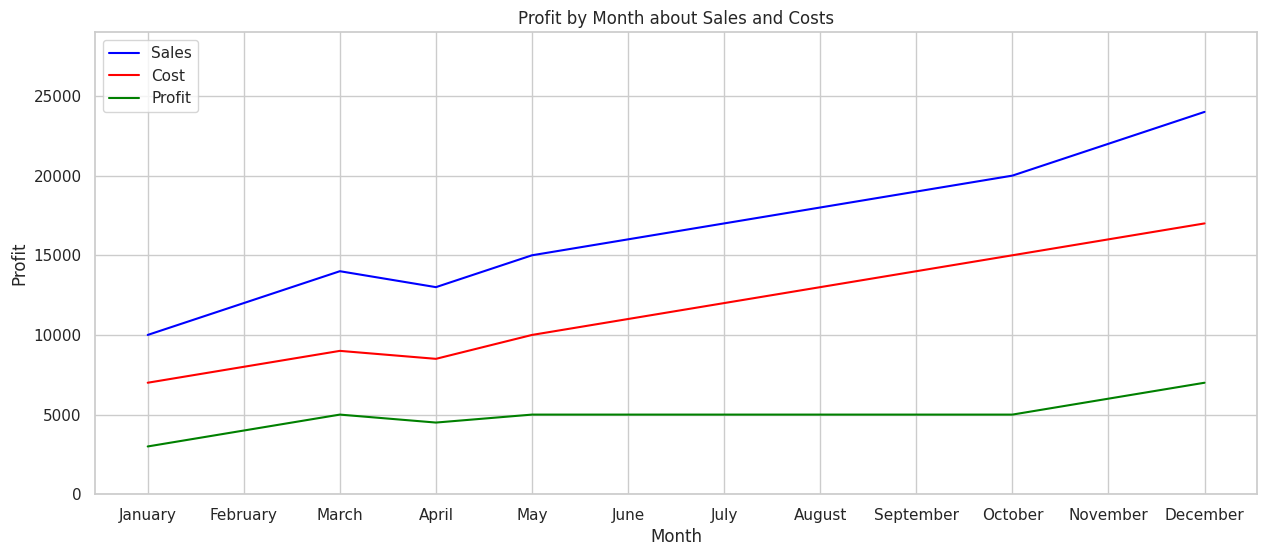

In [53]:
#What was the company's profit?
#What was the sales and costs of the company?
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data = df,x = 'Month', y = 'Sales', linestyle='-', color='blue', label='Sales')
sns.lineplot(data = df,x = 'Month', y = 'Costs', linestyle='-', color='red', label='Cost')
sns.lineplot(data = df,x = 'Month', y = 'Profits', linestyle='-', color='green', label='Profit')
plt.legend()
plt.ylim(0,29000)
plt.title('Profit by Month about Sales and Costs')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

Since Octuber the profits was better that normally, this want say that something happenning in theses months, for example on December is normal that the people tend to spend more too on January is normal that the people tend to spend less.

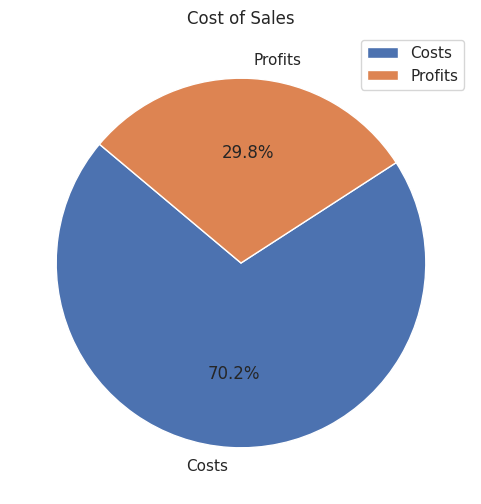

In [54]:
#What was the cost of sales about the profits?

#Extract the values as separate 1D arrays
cost_values = df['Costs'].values
sales_values = df['Sales'].values
Profit_values = df['Profits'].values

#Combine into a single 1D array for the pie chart
values = [cost_values.sum(), Profit_values.sum()]
groups = ['Costs', 'Profits']  # Labels for the slices

plt.figure(figsize=(6, 6))
plt.pie(values, labels=groups, autopct='%1.1f%%', startangle=140)
plt.title('Cost of Sales')
plt.legend()


plt.show()

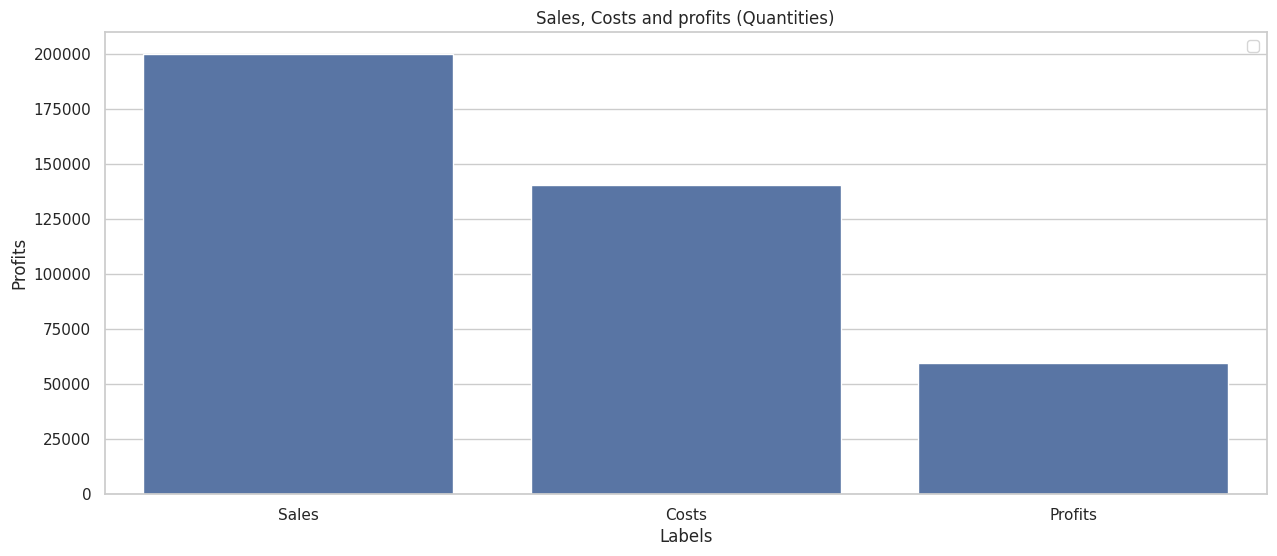

In [55]:
groups_2 = ['Sales', 'Costs','Profits']


values_2 = [df['Sales'].values.sum(), df['Costs'].values.sum(), df['Profits'].values.sum()]
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(values_2)
plt.legend()
plt.title('Sales, Costs and profits (Quantities)')
plt.xlabel('Labels')
plt.ylabel('Profits')
plt.xticks(range(len(groups_2)),groups_2)
plt.show()

About these plot:

We can see how the company's costs exceed its profits, which isn't good. I had found the sense of this data behavior.

The company obtained just a 29% profits of the sales, the other 70% there're Costs.



In [56]:
#what was the level of the client retention by?

#first Im realize the equation of Client Retention
#last clients - new clients / first clients

df['Customers at Start'] = df['Total Customers'].shift(1).fillna(0).astype(int)

df['Retention Rate'] = ((df['Total Customers'] - df['New Customers']) / df['Customers at Start']) * 100
df['Retention Rate'] = df['Retention Rate'].round(2)
df.fillna(0)


,Month,Sales,Costs,Profits,New Customers,Lost Customers,Total Customers,Customers at Start,Retention Rate
0,January,10000,7000,3000,50,0,50,0,0.00
1,February,12000,8000,4000,60,3,107,50,94.00
2,March,14000,9000,5000,55,5,157,107,95.33
3,April,13000,8500,4500,65,8,214,157,94.90
4,May,15000,10000,5000,70,11,273,214,94.86
5,June,16000,11000,5000,80,14,339,273,94.87
6,July,17000,12000,5000,90,17,412,339,94.99
7,August,18000,13000,5000,95,21,486,412,94.90
8,September,19000,14000,5000,85,24,547,486,95.06
9,October,20000,15000,5000,100,27,620,547,95.06


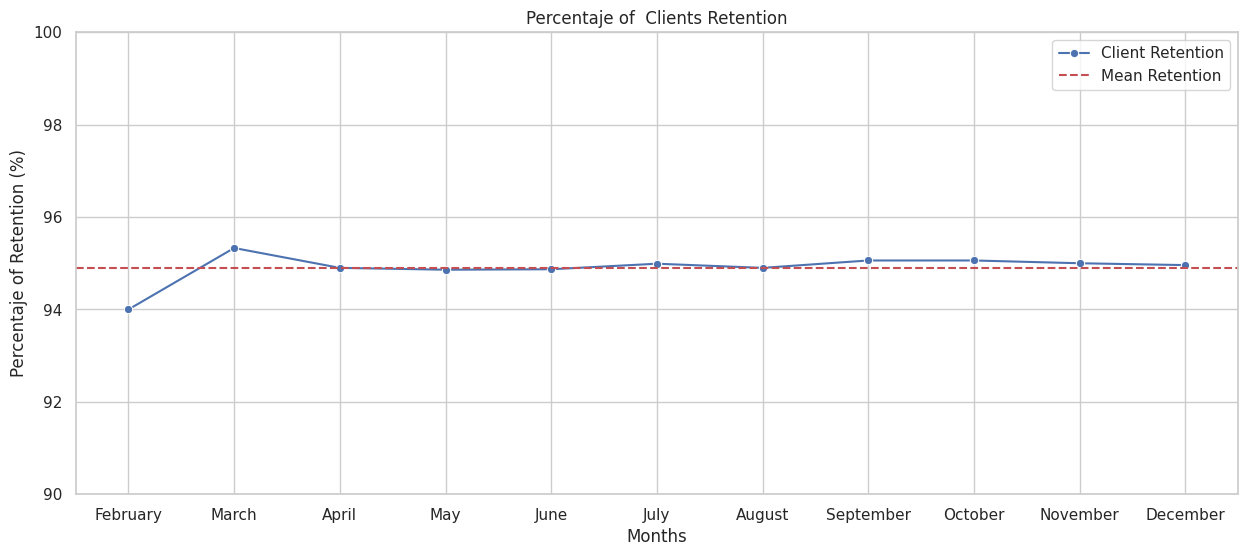

In [57]:
#plot the results

#creating a plot with sns
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot( data = df ,x='Month', y='Retention Rate', marker='o', color='b',label = 'Client Retention')
mean_retention = df['Retention Rate'].mean()
plt.axhline(mean_retention, color='r', linestyle='--', label='Mean Retention')

plt.title('Percentaje of  Clients Retention')
plt.xlabel('Months')
plt.ylabel('Percentaje of Retention (%)')
plt.legend()
plt.ylim(90,100)
plt.show()

The Percentaje of Client Retention is so  good,basically there is around a 94.9%, but the Marketing team should to find the way to achieve the same results with less money. Is necessary improve the marketing tacticals to reduce the expenses costs.

In [58]:
#How much money is necessary to acquired a new client?

#calculating the CAC(Cost of Adquisition by Client) I cant found the asnwer to this question
#CAC = Total investment sum + Number of new clients

df['CAC'] = df['Costs'] / df['New Customers']
df['CAC'] = df['CAC'].round(2)


I calculated the client acquisition cost to determine how much the company spends to acquire a new client. This way, I can present a better perspective on the problem.

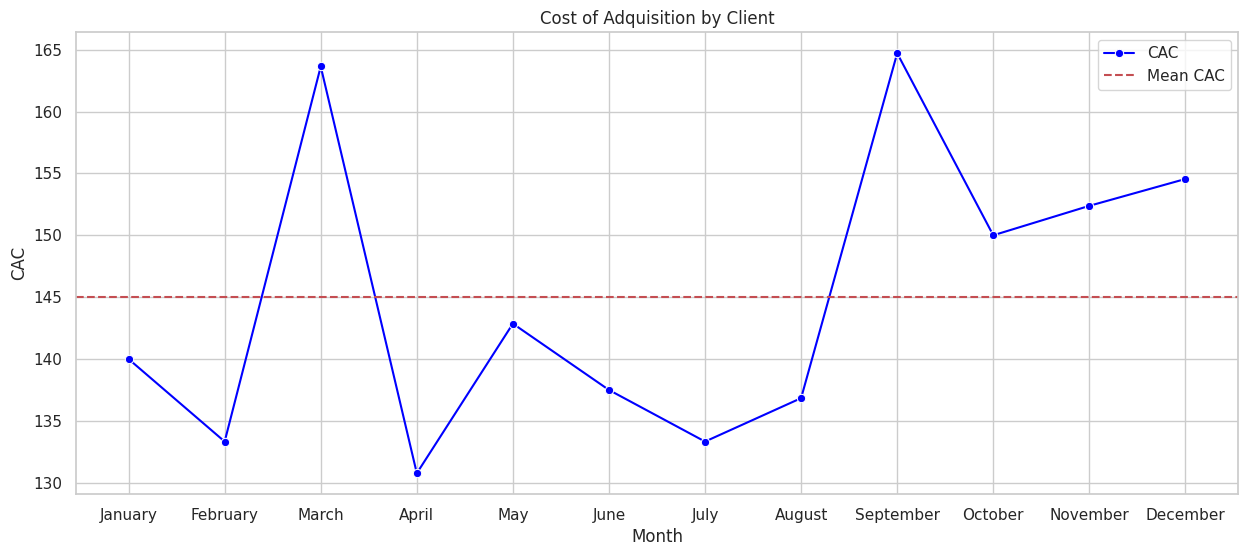

In [59]:

#Plot results

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data = df,x = 'Month', y = 'CAC', linestyle='-', marker = 'o',color='blue', label='CAC')
Mean_CAC = df['CAC'].mean()
plt.title('Cost of Adquisition by Client')
plt.axhline(Mean_CAC, color='r', linestyle='--', label='Mean CAC')
plt.legend()
plt.show()


Here, we can see that in the months of March and September, the acquisition costs are somewhat above the average. However, there isn't actually a loss.

We can almost say that the Costs of adquisition by client and the profit don't have a strong correlation because December shows higher profits than March, and his cliend adquisition cost is smaller than march.

In [60]:
df['total_CAC'] = df['CAC'] * df['New Customers'] #In this line, I calculated the cost of acquisition per client based on the number of clients in each specific month to get the actual cost of acquiring clients.
#this line show the exact  cost line that I created before.
#I made this for be sure that the column of costs is just part of the client adquisition.

df[['Month','total_CAC']]

,Month,total_CAC
0,January,7000.00
1,February,7999.80
2,March,9000.20
3,April,8500.05
4,May,10000.20
5,June,11000.00
6,July,11999.70
7,August,12999.80
8,September,14000.35
9,October,15000.00


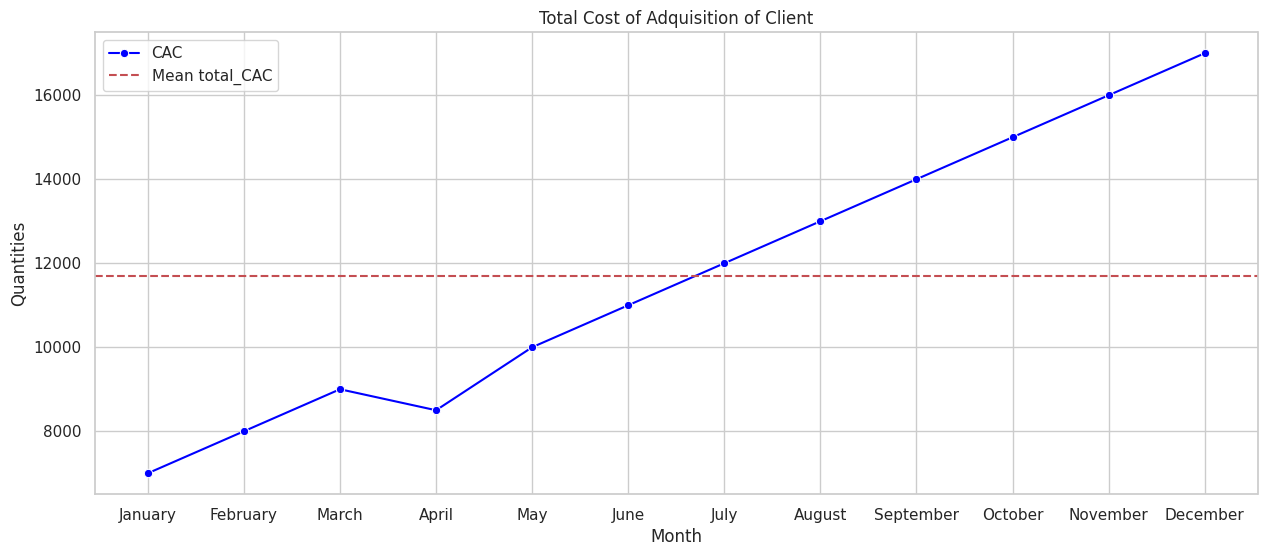

In [63]:

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data = df,x = 'Month', y = 'total_CAC', linestyle='-', marker = 'o',color='blue', label='CAC')
mean_total_CAC = df['total_CAC'].mean()
plt.ylabel('Quantities')
plt.title('Total Cost of Adquisition of Client')
plt.axhline(mean_total_CAC, color='r', linestyle='--', label='Mean total_CAC')
plt.legend()

In this line, I see a perfect correlation with the total client acquisition, rather than the costs. Essentially, I calculated the total cost per month for mean to multiplying the number of clients by the CAC (Customer Acquisition Cost).

In others words, if in january you spend 140 by  client, multiplyng by all the new clients the total costs was around 7000.

#Conclusions

####how can the company do more money?




*  Improve the marketing strategics

 Its necesary reduced the quantitie of money that is use for adquirec new clients. The company is spending more that gain there isn't good.


